<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/Cats%26Dogs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from PIL import Image 
import numpy as np
import os,sys
from sklearn.model_selection import train_test_split
from keras.models import sequential
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Resize images to (300,300)**

In [44]:
path= '/content/drive/MyDrive/Dataanimals'
for filename in glob.iglob(path + '**/*.jpg', recursive=True):
    im = Image.open(filename)
    imResize = im.resize((300,300), Image.ANTIALIAS)
    print(filename)
    imResize.save(filename,)

/content/drive/MyDrive/Dataanimals/dog.4036.jpg
/content/drive/MyDrive/Dataanimals/dog.4016.jpg
/content/drive/MyDrive/Dataanimals/dog.4015.jpg
/content/drive/MyDrive/Dataanimals/dog.4035.jpg
/content/drive/MyDrive/Dataanimals/dog.4034.jpg
/content/drive/MyDrive/Dataanimals/dog.4006.jpg
/content/drive/MyDrive/Dataanimals/dog.4017.jpg
/content/drive/MyDrive/Dataanimals/dog.4024.jpg
/content/drive/MyDrive/Dataanimals/dog.4013.jpg
/content/drive/MyDrive/Dataanimals/dog.4005.jpg
/content/drive/MyDrive/Dataanimals/dog.4025.jpg
/content/drive/MyDrive/Dataanimals/dog.4027.jpg
/content/drive/MyDrive/Dataanimals/dog.4028.jpg
/content/drive/MyDrive/Dataanimals/dog.4012.jpg
/content/drive/MyDrive/Dataanimals/dog.4001.jpg
/content/drive/MyDrive/Dataanimals/dog.4002.jpg
/content/drive/MyDrive/Dataanimals/dog.4014.jpg
/content/drive/MyDrive/Dataanimals/dog.4023.jpg
/content/drive/MyDrive/Dataanimals/dog.4026.jpg
/content/drive/MyDrive/Dataanimals/dog.4004.jpg
/content/drive/MyDrive/Dataanimals/dog.4

Populating the interactive namespace from numpy and matplotlib


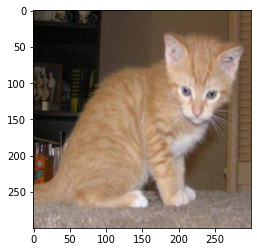

(300, 300, 3)

In [45]:
%pylab inline
img = mpimg.imread('/content/drive/MyDrive/Dataanimals/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()
img.shape

In [19]:
pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Put in dataframe images and the label, 1 for dogs and 0 for cats **

In [46]:
filepath = os.listdir(r"/content/drive/MyDrive/Dataanimals/")
directory = "/content/drive/MyDrive/Dataanimals"
import tqdm
x=[]
y= []
for i in filepath:
  category=i.split('.')[0]
  if category=='dog':
      y.append(1)
  else:
      y.append(0)
  img = mpimg.imread(os.path.join(directory,i))
  x.append(img)
df=pd.DataFrame({
    'file':filepath,
    'categ':y
})

In [47]:
print(df)

            file  categ
0   dog.4036.jpg      1
1   dog.4016.jpg      1
2   dog.4015.jpg      1
3   dog.4035.jpg      1
4   dog.4034.jpg      1
5   dog.4006.jpg      1
6   dog.4017.jpg      1
7   dog.4024.jpg      1
8   dog.4013.jpg      1
9   dog.4005.jpg      1
10  dog.4025.jpg      1
11  dog.4027.jpg      1
12  dog.4028.jpg      1
13  dog.4012.jpg      1
14  dog.4001.jpg      1
15  dog.4002.jpg      1
16  dog.4014.jpg      1
17  dog.4023.jpg      1
18  dog.4026.jpg      1
19  dog.4004.jpg      1
20  dog.4003.jpg      1
21  dog.4039.jpg      1
22  dog.4038.jpg      1
23  dog.4037.jpg      1
24  dog.4049.jpg      1
25  dog.4048.jpg      1
26  dog.4047.jpg      1
27  dog.4050.jpg      1
28  dog.4046.jpg      1
29  dog.4045.jpg      1
30  cat.4034.jpg      0
31  cat.4016.jpg      0
32  cat.4047.jpg      0
33  cat.4026.jpg      0
34  cat.4002.jpg      0
35  cat.4046.jpg      0
36  cat.4035.jpg      0
37  cat.4045.jpg      0
38  cat.4039.jpg      0
39  cat.4048.jpg      0
40  cat.4005.jpg

In [51]:
print(np.array(x).shape)
print(np.array(y).shape)

(60, 300, 300, 3)
(60,)


**Data augmentation **

In [54]:

data_augmentation = tf.keras.Sequential([
layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.2),
])
img=[]
lbl = []
for i in range(len(x)) :
  image = tf.cast(tf.expand_dims(x[i]/255, 0), tf.float32)
  for j in range(9):
    augmented_image = data_augmentation(image)
    img.append(augmented_image[0])
    
  

In [56]:
print(np.array(img).shape)
y1=np.repeat(range(2),270)
print(np.array(y1).shape)

(540, 300, 300, 3)
(540,)


**Split the data to 2/3 train and 1/3 test**

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img,y1 ,test_size= 0.33)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import losses
from sklearn.model_selection import train_test_split
from keras.models import sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical

In [59]:
classifier=Sequential()
classifier.add(Convolution2D(32,kernel_size=9,input_shape=(300,300,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Flatten())
classifier.add(Dense(30,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
x_train = tf.stack(x_train)
y_train = tf.stack(y_train)


In [64]:
classifier.fit(x_train,y_train, epochs=50 ,batch_size=32 )

Epoch 1/50
12/12 [==============================] - 63s 5s/step - loss: 4.2287 - accuracy: 0.5208
Epoch 2/50
12/12 [==============================] - 59s 5s/step - loss: 0.6505 - accuracy: 0.5374
Epoch 3/50
12/12 [==============================] - 59s 5s/step - loss: 0.5277 - accuracy: 0.6925
Epoch 4/50
12/12 [==============================] - 57s 5s/step - loss: 0.4505 - accuracy: 0.8393
Epoch 5/50
12/12 [==============================] - 57s 5s/step - loss: 0.2630 - accuracy: 0.9114
Epoch 6/50
12/12 [==============================] - 58s 5s/step - loss: 0.1562 - accuracy: 0.9640
Epoch 7/50
12/12 [==============================] - 57s 5s/step - loss: 0.0692 - accuracy: 0.9889
Epoch 8/50
12/12 [==============================] - 57s 5s/step - loss: 0.0215 - accuracy: 1.0000
Epoch 9/50
12/12 [==============================] - 57s 5s/step - loss: 0.0083 - accuracy: 1.0000
Epoch 10/50
12/12 [==============================] - 57s 5s/step - loss: 0.0032 - accuracy: 1.0000
Epoch 11/50
12/12 [